<h1 align="center"><b>AgriYield Predictor</b></h1>
<h2 align="center"> - Manju Varshikha S </h2>


In [1]:
# -----------------------------------------
# Step 0: Import necessary libraries
# -----------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for plots
sns.set(style="whitegrid")

In [2]:
# -----------------------------------------
# Step 1: Load datasets
# -----------------------------------------
soil_data = pd.read_csv("data/Crop_recommendation.csv")  # Soil and crop environment dataset
fao_data = pd.read_csv("data/FAOSTAT_data_en_11-18-2025.csv")          # FAO crop statistics dataset

print("Soil dataset preview:")
display(soil_data.head())

print("FAO dataset preview:")
display(fao_data.head())

Soil dataset preview:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


FAO dataset preview:


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,356,India,5312,Area harvested,01654,"Anise, badian, coriander, cumin, caraway, fenn...",2005,2005,ha,446931.0,A,Official figure,NaN
1,QCL,Crops and livestock products,356,India,5412,Yield,01654,"Anise, badian, coriander, cumin, caraway, fenn...",2005,2005,kg/ha,584.4,A,Official figure,NaN
2,QCL,Crops and livestock products,356,India,5510,Production,01654,"Anise, badian, coriander, cumin, caraway, fenn...",2005,2005,t,261170.0,A,Official figure,NaN
3,QCL,Crops and livestock products,356,India,5312,Area harvested,01654,"Anise, badian, coriander, cumin, caraway, fenn...",2006,2006,ha,473089.0,A,Official figure,NaN
4,QCL,Crops and livestock products,356,India,5412,Yield,01654,"Anise, badian, coriander, cumin, caraway, fenn...",2006,2006,kg/ha,568.1,A,Official figure,NaN


In [3]:
# -----------------------------------------
# Step 2: Clean FAO crop names
# -----------------------------------------
fao_data["crop_cleaned"] = (
    fao_data["Item"]
    .str.lower()        # Lowercase for uniformity
    .str.strip()        # Remove spaces
    .str.split(",")     # Split multiple crops listed in one cell
)
fao_data = fao_data.explode("crop_cleaned")  # Each crop gets its own row
fao_data["crop_cleaned"] = fao_data["crop_cleaned"].str.strip()  # Clean whitespace

print("FAO dataset after cleaning crop names:")
display(fao_data[["Item", "crop_cleaned"]].head(10))

FAO dataset after cleaning crop names:


,Item,crop_cleaned
0,"Anise, badian, coriander, cumin, caraway, fenn...",anise
0,"Anise, badian, coriander, cumin, caraway, fenn...",badian
0,"Anise, badian, coriander, cumin, caraway, fenn...",coriander
0,"Anise, badian, coriander, cumin, caraway, fenn...",cumin
0,"Anise, badian, coriander, cumin, caraway, fenn...",caraway
0,"Anise, badian, coriander, cumin, caraway, fenn...",fennel and juniper berries
0,"Anise, badian, coriander, cumin, caraway, fenn...",raw
1,"Anise, badian, coriander, cumin, caraway, fenn...",anise
1,"Anise, badian, coriander, cumin, caraway, fenn...",badian
1,"Anise, badian, coriander, cumin, caraway, fenn...",coriander


In [4]:
# -----------------------------------------
# Step 3: Clean soil dataset crop labels
# -----------------------------------------
soil_data["label_cleaned"] = soil_data["label"].str.lower().str.strip()
print("Soil dataset after cleaning labels:")
display(soil_data.head())

Soil dataset after cleaning labels:


,N,P,K,temperature,humidity,ph,rainfall,label,label_cleaned
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,rice


In [5]:
# -----------------------------------------
# Step 4: Merge datasets on crop name
# -----------------------------------------
merged_data = pd.merge(
    soil_data,
    fao_data,
    left_on="label_cleaned",
    right_on="crop_cleaned",
    how="inner"
)

# Keep only production data
merged_data = merged_data[merged_data["Element"] == "Production"]

print("Merged dataset preview:")
display(merged_data.head())

Merged dataset preview:


,N,P,K,temperature,humidity,ph,rainfall,label,label_cleaned,Domain Code,...,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note,crop_cleaned
2,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice,QCL,...,0113,Rice,2005,2005,t,137690096.0,A,Official figure,NaN,rice
5,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice,QCL,...,0113,Rice,2006,2006,t,139136992.0,A,Official figure,NaN,rice
8,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice,QCL,...,0113,Rice,2007,2007,t,144570000.0,A,Official figure,NaN,rice
11,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice,QCL,...,0113,Rice,2008,2008,t,148036000.0,A,Official figure,NaN,rice
14,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice,QCL,...,0113,Rice,2009,2009,t,135672992.0,A,Official figure,NaN,rice


In [6]:
# -----------------------------------------
# Step 5: Drop unnecessary columns
# -----------------------------------------
columns_to_remove = [
    "Domain Code", "Domain", "Area Code (M49)", "Area",
    "Element Code", "Item Code (CPC)", "Item", "Year Code",
    "Year", "Flag", "Flag Description", "Note", "Unit",
    "label", "Element", "label_cleaned"
]
merged_data = merged_data.drop(columns=columns_to_remove, errors='ignore')

print("Dataset after dropping unnecessary columns:")
display(merged_data.head())

Dataset after dropping unnecessary columns:


,N,P,K,temperature,humidity,ph,rainfall,Value,crop_cleaned
2,90,42,43,20.879744,82.002744,6.502985,202.935536,137690096.0,rice
5,90,42,43,20.879744,82.002744,6.502985,202.935536,139136992.0,rice
8,90,42,43,20.879744,82.002744,6.502985,202.935536,144570000.0,rice
11,90,42,43,20.879744,82.002744,6.502985,202.935536,148036000.0,rice
14,90,42,43,20.879744,82.002744,6.502985,202.935536,135672992.0,rice


In [7]:
# -----------------------------------------
# Step 6: Remove duplicates
# -----------------------------------------
merged_data = merged_data.drop_duplicates()
print(f"Shape after removing duplicates: {merged_data.shape}")
display(merged_data.head())


Shape after removing duplicates: (7600, 9)


,N,P,K,temperature,humidity,ph,rainfall,Value,crop_cleaned
2,90,42,43,20.879744,82.002744,6.502985,202.935536,137690096.0,rice
5,90,42,43,20.879744,82.002744,6.502985,202.935536,139136992.0,rice
8,90,42,43,20.879744,82.002744,6.502985,202.935536,144570000.0,rice
11,90,42,43,20.879744,82.002744,6.502985,202.935536,148036000.0,rice
14,90,42,43,20.879744,82.002744,6.502985,202.935536,135672992.0,rice


In [8]:
# -----------------------------------------
# Step 7: Dataset summary
# -----------------------------------------
print("Dataset info:")
merged_data.info()

print("\nStatistical summary:")
display(merged_data.describe())

print("\nCrop distribution:")
display(merged_data['crop_cleaned'].value_counts())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 7600 entries, 2 to 22799
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   N             7600 non-null   int64  
 1   P             7600 non-null   int64  
 2   K             7600 non-null   int64  
 3   temperature   7600 non-null   float64
 4   humidity      7600 non-null   float64
 5   ph            7600 non-null   float64
 6   rainfall      7600 non-null   float64
 7   Value         7600 non-null   float64
 8   crop_cleaned  7600 non-null   object 
dtypes: float64(5), int64(3), object(1)
memory usage: 593.8+ KB

Statistical summary:


,N,P,K,temperature,humidity,ph,rainfall,Value
count,7600.000000,7600.000000,7600.00000,7600.000000,7600.000000,7600.000000,7600.000000,7.600000e+03
mean,70.667500,63.927500,77.47750,24.509440,75.664440,6.493623,159.663009,4.214840e+07
std,31.213461,41.008823,70.99523,5.098769,10.574848,0.593996,63.736465,7.118975e+07
min,0.000000,15.000000,25.00000,8.825675,50.045570,5.005307,65.010953,2.620000e+05
25%,55.000000,37.000000,35.00000,23.176366,70.648966,6.085485,105.096066,7.475250e+05
50%,79.000000,47.000000,40.00000,24.846438,80.719235,6.428868,168.977582,1.867380e+06
75%,92.000000,75.000000,82.50000,26.392599,82.739731,6.981234,194.931719,3.672325e+07
max,120.000000,145.000000,205.00000,41.948657,89.891065,7.868475,298.560117,2.067270e+08



Crop distribution:


crop_cleaned
rice      1900
grapes    1900
jute      1900
coffee    1900
Name: count, dtype: int64

In [9]:
# -----------------------------------------
# Step 8: Detect outliers (IQR method)
# -----------------------------------------
numeric_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'Value']

def detect_outliers(df, col):
    """Return rows considered outliers for a given column using IQR."""
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)]

print("Number of outliers per numeric column:")
for col in numeric_columns:
    count = len(detect_outliers(merged_data, col))
    print(f"{col}: {count}")

Number of outliers per numeric column:
N: 0
P: 1007
K: 1900
temperature: 1102
humidity: 342
ph: 0
rainfall: 0
Value: 1900


In [10]:
# -----------------------------------------
# Step 9: Remove outliers
# -----------------------------------------
def remove_outliers(df, col):
    """Remove outliers from the dataframe for a given column using IQR."""
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

cleaned_data = merged_data.copy()
for col in numeric_columns:
    cleaned_data = remove_outliers(cleaned_data, col)

print(f"Shape after removing outliers: {cleaned_data.shape}")
display(cleaned_data.head())


Shape after removing outliers: (5263, 9)


,N,P,K,temperature,humidity,ph,rainfall,Value,crop_cleaned
2,90,42,43,20.879744,82.002744,6.502985,202.935536,137690096.0,rice
5,90,42,43,20.879744,82.002744,6.502985,202.935536,139136992.0,rice
8,90,42,43,20.879744,82.002744,6.502985,202.935536,144570000.0,rice
11,90,42,43,20.879744,82.002744,6.502985,202.935536,148036000.0,rice
14,90,42,43,20.879744,82.002744,6.502985,202.935536,135672992.0,rice


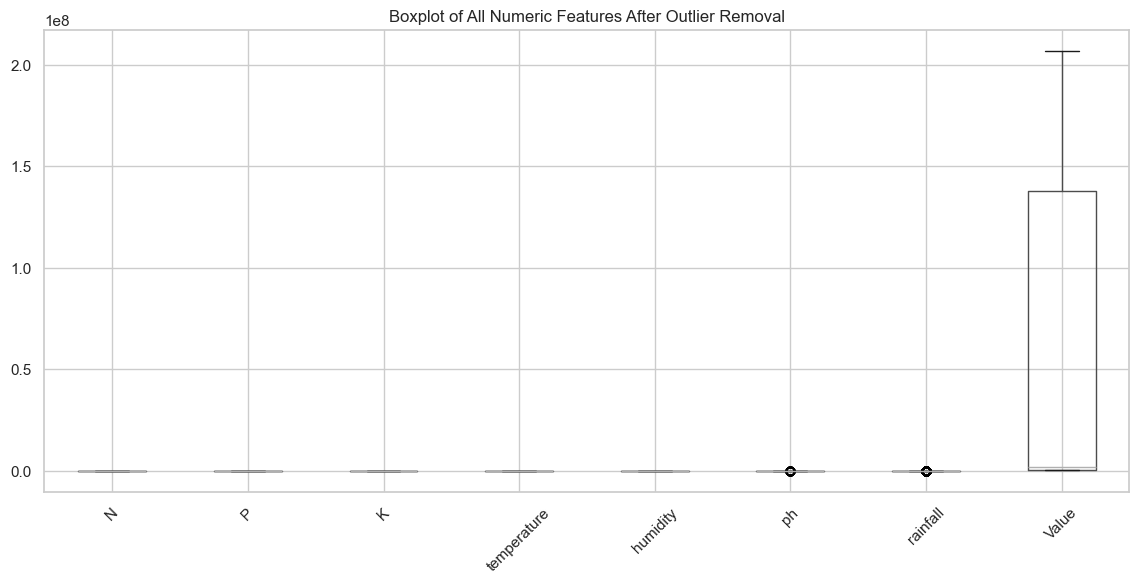

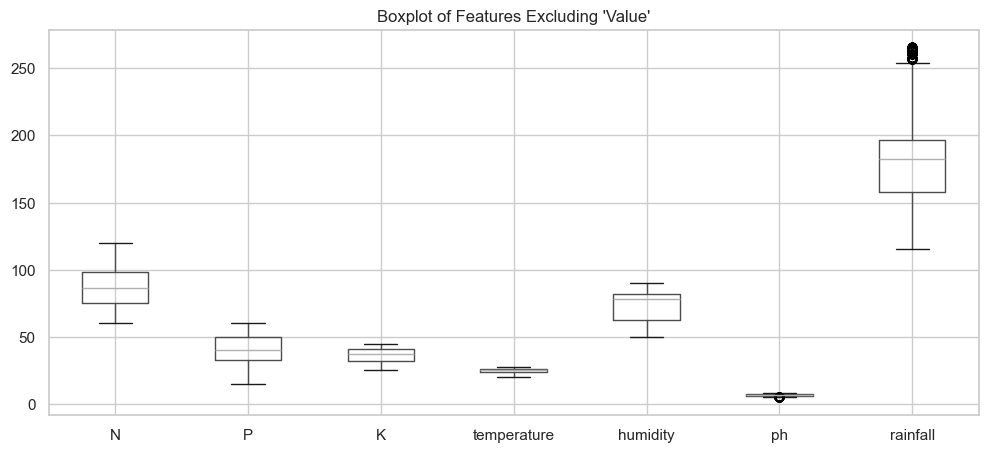

In [11]:
# -----------------------------------------
# Step 10: Visualize numeric features
# -----------------------------------------
plt.figure(figsize=(14,6))
cleaned_data[numeric_columns].boxplot()
plt.title("Boxplot of All Numeric Features After Outlier Removal")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,5))
cleaned_data[numeric_columns].drop(columns=['Value']).boxplot()
plt.title("Boxplot of Features Excluding 'Value'")
plt.show()

In [12]:
# -----------------------------------------
# Step 11: Identify crops missing in FAO dataset
# -----------------------------------------
missing_crops = set(soil_data["label_cleaned"].unique()) - set(fao_data["crop_cleaned"].unique())
print("Crops in soil dataset but missing in FAO dataset:", missing_crops)

Crops in soil dataset but missing in FAO dataset: {'coconut', 'banana', 'blackgram', 'apple', 'pigeonpeas', 'cotton', 'pomegranate', 'watermelon', 'mango', 'orange', 'muskmelon', 'chickpea', 'mothbeans', 'maize', 'mungbean', 'papaya', 'lentil', 'kidneybeans'}


In [13]:
# -----------------------------------------
# Step 12: Final cleaned dataset
# -----------------------------------------
cleaned_data.reset_index(drop=True, inplace=True)
print("Final cleaned dataset:")
display(cleaned_data.head())

Final cleaned dataset:


,N,P,K,temperature,humidity,ph,rainfall,Value,crop_cleaned
0,90,42,43,20.879744,82.002744,6.502985,202.935536,137690096.0,rice
1,90,42,43,20.879744,82.002744,6.502985,202.935536,139136992.0,rice
2,90,42,43,20.879744,82.002744,6.502985,202.935536,144570000.0,rice
3,90,42,43,20.879744,82.002744,6.502985,202.935536,148036000.0,rice
4,90,42,43,20.879744,82.002744,6.502985,202.935536,135672992.0,rice
